In [18]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='VMkpvwvvMV42nCKhEWoNTc_gGuZiTPhqLP1zVl6g5YVu',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.au-syd.cloud-object-storage.appdomain.cloud')

bucket = 'project-donotdelete-pr-p3gfndvfhej9mq'
object_key = 'Social Welfare Schemes.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head(10)

,finyear,lgdstatecode,statename,lgddistrictcode,districtname,schemecode,totalbeneficiaries,totalmale,totalfemale,totaltransgender,totalsc,totalst,totalgen,totalobc,totalaadhaar,totalmobilenumber
0,2025-2026,1,JAMMU AND KASHMIR,1,ANANTNAG,IGNDPS,108,72,36,0,0,3,104,1,108,69
1,2025-2026,1,JAMMU AND KASHMIR,1,ANANTNAG,IGNOAPS,8438,5059,3379,0,37,235,8083,83,8371,7190
2,2025-2026,1,JAMMU AND KASHMIR,1,ANANTNAG,IGNWPS,202,0,202,0,1,15,180,6,200,159
3,2025-2026,1,JAMMU AND KASHMIR,10,POONCH,IGNDPS,310,211,99,0,0,77,200,33,234,110
4,2025-2026,1,JAMMU AND KASHMIR,10,POONCH,IGNOAPS,5958,3958,2000,0,2,1347,4367,242,3875,2287
5,2025-2026,1,JAMMU AND KASHMIR,10,POONCH,IGNWPS,382,0,382,0,0,65,298,19,260,90
6,2025-2026,1,JAMMU AND KASHMIR,11,PULWAMA,IGNDPS,95,63,32,0,0,6,81,8,94,93
7,2025-2026,1,JAMMU AND KASHMIR,11,PULWAMA,IGNOAPS,5021,2911,2110,0,1,197,4443,380,5021,4935
8,2025-2026,1,JAMMU AND KASHMIR,11,PULWAMA,IGNWPS,304,0,304,0,0,20,260,24,304,258
9,2025-2026,1,JAMMU AND KASHMIR,12,RAJAURI,IGNDPS,78,52,26,0,5,5,68,0,72,3


In [12]:
# Inspect data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   finyear             2156 non-null   object
 1   lgdstatecode        2156 non-null   int64 
 2   statename           2156 non-null   object
 3   lgddistrictcode     2156 non-null   int64 
 4   districtname        2156 non-null   object
 5   schemecode          2156 non-null   object
 6   totalbeneficiaries  2156 non-null   int64 
 7   totalmale           2156 non-null   int64 
 8   totalfemale         2156 non-null   int64 
 9   totaltransgender    2156 non-null   int64 
 10  totalsc             2156 non-null   int64 
 11  totalst             2156 non-null   int64 
 12  totalgen            2156 non-null   int64 
 13  totalobc            2156 non-null   int64 
 14  totalaadhaar        2156 non-null   int64 
 15  totalmobilenumber   2156 non-null   int64 
dtypes: int64(12), object(4)


In [13]:
print(df.describe())

       lgdstatecode  lgddistrictcode  totalbeneficiaries      totalmale  \
count   2156.000000      2156.000000         2156.000000    2156.000000   
mean      18.085807       366.853432        13864.290353    5518.308442   
std        9.770668       211.760095        22855.917172   11926.748715   
min        1.000000         1.000000            2.000000       0.000000   
25%        9.000000       185.000000          961.750000       0.000000   
50%       19.000000       365.000000         4702.500000     503.000000   
75%       24.000000       546.250000        17377.000000    4819.500000   
max       38.000000       763.000000       278410.000000  130524.000000   

         totalfemale  totaltransgender       totalsc       totalst  \
count    2156.000000       2156.000000   2156.000000   2156.000000   
mean     8344.925325          0.926716   2370.432282   1387.965213   
std     12518.941254          6.692879   4760.239674   3850.474062   
min         1.000000          0.000000      

In [15]:
print(df.isnull().sum())

finyear               0
lgdstatecode          0
statename             0
lgddistrictcode       0
districtname          0
schemecode            0
totalbeneficiaries    0
totalmale             0
totalfemale           0
totaltransgender      0
totalsc               0
totalst               0
totalgen              0
totalobc              0
totalaadhaar          0
totalmobilenumber     0
dtype: int64


In [19]:
print("Initial data shape:", df.shape)
print(df.head())

Initial data shape: (2156, 16)
     finyear  lgdstatecode          statename  lgddistrictcode districtname  \
0  2025-2026             1  JAMMU AND KASHMIR                1     ANANTNAG   
1  2025-2026             1  JAMMU AND KASHMIR                1     ANANTNAG   
2  2025-2026             1  JAMMU AND KASHMIR                1     ANANTNAG   
3  2025-2026             1  JAMMU AND KASHMIR               10       POONCH   
4  2025-2026             1  JAMMU AND KASHMIR               10       POONCH   

  schemecode  totalbeneficiaries  totalmale  totalfemale  totaltransgender  \
0     IGNDPS                 108         72           36                 0   
1    IGNOAPS                8438       5059         3379                 0   
2     IGNWPS                 202          0          202                 0   
3     IGNDPS                 310        211           99                 0   
4    IGNOAPS                5958       3958         2000                 0   

   totalsc  totalst  tota

In [20]:
# Step 1: Drop duplicates and unnecessary columns if any
df.drop_duplicates(inplace=True)

In [21]:
# Step 2: Identify target and features
target_col = 'schemecode'  # Assuming this column is the label
X = df.drop(columns=[target_col])
y = df[target_col]

In [22]:
# Step 3: Separate column types
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# Step 4: Define preprocessing for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [25]:
# Step 5: Combine preprocessing for full dataset
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [26]:
# Step 6: Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [27]:
# Step 7: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [28]:
# Step 8: Fit preprocessor to training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [29]:
# Final shapes
print("Processed training data shape:", X_train_processed.shape)
print("Processed test data shape:", X_test_processed.shape)

Processed training data shape: (1724, 767)
Processed test data shape: (432, 767)


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import joblib


In [32]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.6 MB/s eta 0:00:00


In [33]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_processed, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_processed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)


Model: Logistic Regression
Accuracy: 0.8680555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       141
           1       1.00      0.88      0.93       146
           2       0.80      0.84      0.82       145

    accuracy                           0.87       432
   macro avg       0.88      0.87      0.87       432
weighted avg       0.88      0.87      0.87       432



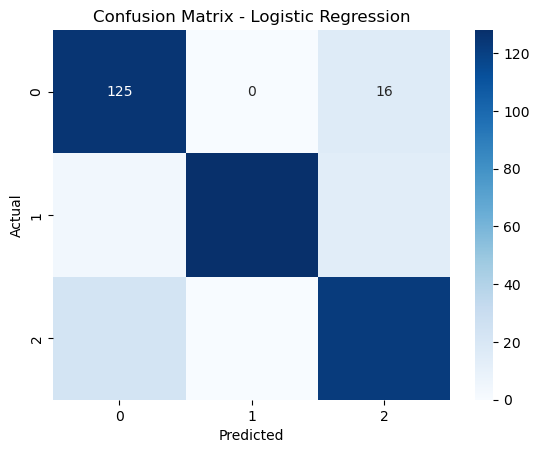


Model: Random Forest
Accuracy: 0.9884259259259259
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       141
           1       0.99      0.97      0.98       146
           2       1.00      1.00      1.00       145

    accuracy                           0.99       432
   macro avg       0.99      0.99      0.99       432
weighted avg       0.99      0.99      0.99       432



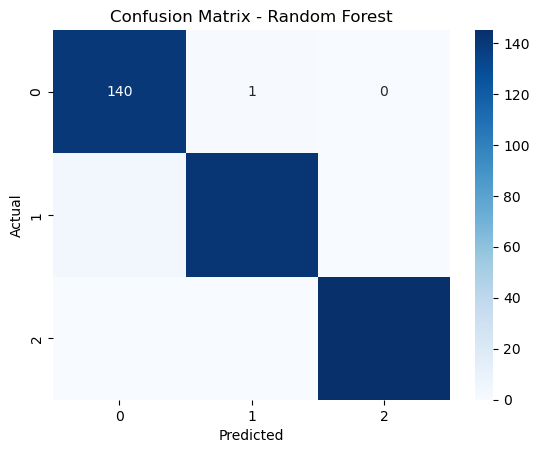


Model: XGBoost
Accuracy: 0.9930555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       141
           1       1.00      0.98      0.99       146
           2       1.00      1.00      1.00       145

    accuracy                           0.99       432
   macro avg       0.99      0.99      0.99       432
weighted avg       0.99      0.99      0.99       432



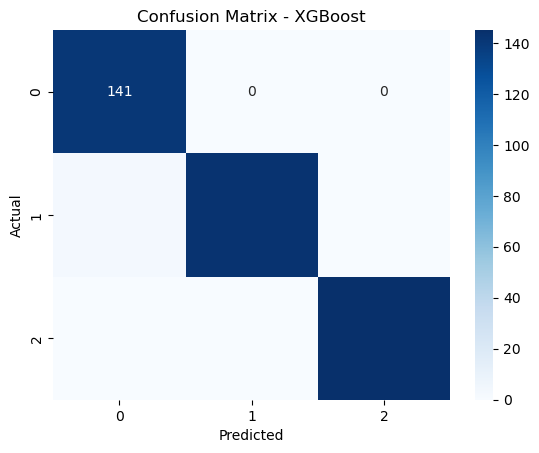

In [34]:
models = {'Logistic Regression': log_model, 'Random Forest': rf_model, 'XGBoost': xgb_model}

for name, model in models.items():
    y_pred = model.predict(X_test_processed)
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [36]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1)

grid_search.fit(X_train_processed, y_train)
best_rf_model = grid_search.best_estimator_
print("Best Random Forest Model:", best_rf_model)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Random Forest Model: RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=42)


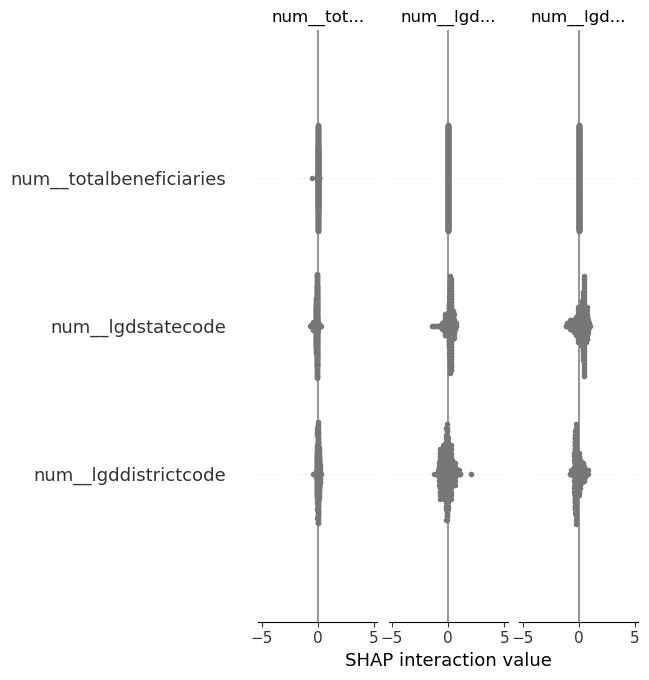

In [41]:
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_processed)

# Summary plot
shap.summary_plot(shap_values, X_test_processed, feature_names=preprocessor.get_feature_names_out())


In [43]:
joblib.dump(best_rf_model, 'best_model.pkl')

['best_model.pkl']